# Probability Theory

## Basic Concepts

**Intuitive meaning of probability:** The frequency of an outcome in a large number of trials, mathematically:

$P(A) = \lim_{n \rightarrow \infty} \frac{n_A}{n}$

where $n_A$ is the number of times event $A$ occurs in $n$ trials.

**Sample Space ($\Omega$):** The set of all possible outcomes of a random process.

**Event ($A$):** A subset of the sample space: $A \subset \Omega$.

$2^\Omega$ is the **powerset** of $\Omega$. Let $\sigma(\Omega) \subset 2^\Omega$ be the set of all possible events. Then $\sigma(\Omega)$ is called the **event space**. Technically speaking, it is a **$\sigma$-algebra**. It is a collection of subsets of $\Omega$ that is closed under countable unions, countable intersections, and complements. That is, if $A_1, A_2, \dots \in \sigma(\Omega)$, then:

1. $\bigcup_{i=1}^{\infty} A_i \in \sigma(\Omega)$
2. $\bigcap_{i=1}^{\infty} A_i \in \sigma(\Omega)$
3. $A^c \in \sigma(\Omega)$

For many discrete sample spaces such as the outcome of the roll of a pair of dice, it is possible to assume that $2^\Omega=\sigma(\Omega)$. However, for continuous sample spaces we need to define a $\sigma$-algebra that is smaller than $2^\Omega$. 

A **probability measure** is a function $P: \sigma(\Omega) \rightarrow [0,1]$ such that:

1. $P(\Omega) = 1$
2. $P(A) \geq 0$ for all $A \in \sigma(\Omega)$
3. If $A_1, A_2, \dots$ are disjoint events (i.e. $A_i \cap A_j = \emptyset$ for all $i \neq j$\), then $P(\bigcup_{i=1}^{\infty} A_i) = \sum_{i=1}^{\infty} P(A_i)$

**Probability Space:** A tuple defined as $(\Omega, \sigma(\Omega), P)$.

**Inclusion-Exclusion Principle:** $P(A \cup B) = P(A) + P(B) - P(A \cap B)$. This takes into account the fact that $P(A \cap B)$ is counted twice in $P(A) + P(B)$. A direct consequence of this is that $P(A \cup B) \leq P(A) + P(B)$ which is called the **union bound**.

**Conditional Probability:** $P(A|B) = \frac{P(A \cap B)}{P(B)}$. The intuitive meaning of this is the probability of event $A$ given that event $B$ has occurred. That is, the frequency of event $A$ in the subset of trials where event $B$ has occurred. In mathematical terms

$P(A|B) = \lim_{n \rightarrow \infty} \frac{n_{A \cap B}}{n_B}$

where $n_{A \cap B}$ is the number of times event $A$ occurs in $n$ trials where event $B$ has occurred, and $n_B$ is the number of times event $B$ has occurred in $n$ trials.

The definition of conditional probability can be rewritten as $P(A \cap B) = P(A|B)P(B)$. This is called the **product rule**.

**Independence:** If the probability of event $A$ is not affected by the occurrence of event $B$, these two events are said to be independent.
In terms of conditional probabilities we can describe this situation as  $P(A|B) = P(A)$. Applied to the definition of conditional probability, this means that $A$ and $B$ are independent if and only if $P(A \cap B) = P(A)P(B)$.

**Law of Total Probability:** If $B_1, B_2, \dots, B_n$ is a partition of $\Omega$, i.e. $B_i \cap B_j = \emptyset$ for all $i \neq j$ and $\bigcup_{i=1}^n B_i = \Omega$, then $P(A) = \sum_{i=1}^n P(A|B_i)P(B_i)$.

**Bayes' Rule:** $P(A|B) = \frac{P(B|A)P(A)}{P(B)}$. This can be derived from the definition of conditional probability as follows:

$P(A \cap B) = P(A|B)P(B) = P(B|A)P(A) \Rightarrow P(A|B) = \frac{P(B|A)P(A)}{P(B)}$.

While looking trivial in the first glance, Bayes' rule has big implications on statistical inference, as well as machine learning. For instance, assume $H_1, H_2, \dots, H_n$ are mutually exclusive hypotheses that partition a hypothesis space $\mathcal{H}$, i.e. $H_i \cap H_j = \emptyset$ for all $i \neq j$ and $\bigcup_{i=1}^n H_i = \mathcal{H}$. Also assume that $D$ is the observed data. Then, Bayes' rule can be written as:

$P(H_i|D) = \frac{P(D|H_i)P(H_i)}{P(D)} = \frac{P(D|H_i)P(H_i)}{\sum_{j=1}^n P(D|H_j)P(H_j)}$.

Here,

  * $P(H_i)$ is our **prior belief** in a hypothesis $H_i$,
  * $P(H_i|D)$ is our **posterior belief** in $H_i$ after observing the data $D$, 
  * $P(D|H_i)$ is the **likelihood** of $H_i$, and $P(D)$ is the **evidence**. 
  
The above concepts give a general framework for statistical inference: we start with a prior belief, collect new observations, and update our belief based on them. This approach has connections to how humans make decisions under uncertainty.


## Random Variables

The probability measure we defined above maps sets to numbers. It is not always convenient to describe sets. We can facilitate this by defining a random variable.

A **random variable** is function $X: \Omega \rightarrow \Lambda$ that maps each elementary event $\omega \in \Omega$ to an element on its **range** $\lambda \in \Lambda$. We can define a probability measure on $\Lambda$ as follows:

$P_X(A) := P(\{\omega \in \Omega: X(\omega) \in A\})$

where $A \subset \Lambda$. This is called the **induced probability measure** of $X$. In the simple case where $\Lambda = \{0,1,\ldots,C-1\}$, we have a **discrete random variable**. In this case, we can define a probability measure follows:

$P_X(x) := P(\{\omega \in \Omega: X(\omega) = x\})$

where $x \in \{0,1,\ldots,C-1\}$. This is called the **probability mass function** of $X$.

Consider the experiment of tossing a fair coin three times and denote heads by $H$ and tails by $T$. The sample space for this experiment is $\Omega = \{HHH, HHT, HTH, HTT, THH, THT, TTH, TTT\}$. Because the coin is fair

$P(H) = P(T) = \frac{1}{2}$.

Because the coin tosses are independent events, we have

$P(HHH) = P(H)P(H)P(H) = \frac{1}{2} \cdot \frac{1}{2} \cdot \frac{1}{2} = \frac{1}{8}$

and likewise for all other outcomes. Let $X$ be the number of heads in a sequence. Then $X$ is a random variable with range $\Lambda = \{0,1,2,3\}$. The induced probability measure of $X$ is:

 1. $P_X(0) = P(\{TTT\}) = \frac{1}{8}$
 2. $P_X(1) = P(\{TTH, THT, HTT\}) = \frac{3}{8}$
 3. $P_X(2) = P(\{HTH, HHT, THH\}) = \frac{3}{8}$
 4. $P_X(3) = P(\{HHH\}) = \frac{1}{8}$

The notion of a random variable allows us also to query compound events easily such as $P_X(X \geq 2) = P(\{HTH, HHT, THH, HHH\}) = \frac{1}{2}$.

Let us give another example. Let us make up two random variables from the outcome of the roll of a fair die: 

1. $X$ is the outcome of the die itself i.e. $\Lambda = \{1,2,3,4,5,6\}$.
2. $Y$ is whether the outcome of the die is even or odd, i.e. $\Lambda = \{even, odd\}$.

Consider the case of the joint event $P(X \leq 4 \cap Y = even) =  P(\{2,4\}) = \frac{2}{6}$. Compare it to the individual events  $P(X \leq 4) = P(\{1,2,3,4\}) = \frac{4}{6}$ and $P(Y = even) = P(\{2,4,6\}) = \frac{3}{6}$. We see that $P(X \leq 4 \cap Y = even) = P(X \leq 4)P(Y = even)$. Hence, the events are **independent**. In words, if someone sees the outcome of the experiments and gives the hint to you that the outcomeis less than or equal to 4, this does not help you make a more accurate guess about whether it is even or odd. This is because there are equal number of even and odd numbers less than or equal to 4.

Now consider the joint event $P(X \leq 3 \cap Y = even) = P(\{2\}) = \frac{1}{6}$. Compare it to the individual events $P(X \leq 3) = P(\{1,2,3\}) = \frac{3}{6}$ and $P(Y = even) = P(\{2,4,6\}) = \frac{3}{6}$. We see that $P(X \leq 3 \cap Y = even) \neq P(X \leq 3)P(Y = even)$. Hence, the events are **dependent**. Likewise in words, if someone sees the outcome of the experiments and gives the hint to you that the outcome is less than or equal to 3, this helps you make a more accurate guess about whether it is even or odd. This is because there are more odd numbers less than or equal to 3 than even numbers.

Joint events as exemplified above $P(X = x \cap Y = even)$ are called **joint probability mass functions**. They are also denoted as $P(X=x, Y=y)$. 

There are cases where some of the variables of the joint distributions are uninteresting. They are then called **nuisance variables**. One would then drop them from the joint distribution using the law of total probability. This operation is called **marginalization**. In the above example, one would marginalize $Y$ out of the joint distribution to obtain the marginal distribution of $X$ as follows:

\begin{align*}  
P(X=x) &= \sum_{y \in \{even,odd\}} P(X=x, Y=y) \\
&= \sum_{y \in \{even,odd\}} P(X=x|Y=y)P(Y=y) \\
&= P(X=x | Y=even)P(Y=even) + P(X=x | Y=odd)P(Y=odd)\\
&= \frac{1}{2} P(X=x | Y=even) + \frac{1}{2} P(X=x | Y=odd).
\end{align*}

Using $P(X=x)$ we can query events concerning only the random variable $X$. Its value will take into account all possible values of $Y$ by giving them weights proportional to their probability of occurrence.
 
### Expectation and Variance

One may wonder how the behavior of a random variable can be summarized by a single number. This is where the notion of expectation comes into play. The **expectation** (a.k.a. **expected value**) of a random variable $X$ is defined as:

$E[X] := \sum_{x \in \Lambda} x P_X(x)$

In the three coin tosses example above where the random variable $X$ indicates the number of heads, $E[X] = 1.5$ because $E[X] = 0 \cdot \frac{1}{8} + 1 \cdot \frac{3}{8} + 2 \cdot \frac{3}{8} + 3 \cdot \frac{1}{8} = 1.5$.

The expectation of a random variable is also called its **mean** or **first moment**. The expectation of a random variable is a measure of its **central tendency**. However, it does not tell us anything about the **spread** of the random variable. This can be measured by the **variance** of a random variable which is defined as:

$Var[X] := E[(X-E[X])^2] = E[X^2] - E[X]^2$.

In the above example, $Var[X] = 0.75$ because $Var[X] = E[X^2] - E[X]^2 = 0^2 \cdot \frac{1}{8} + 1^2 \cdot \frac{3}{8} + 2^2 \cdot \frac{3}{8} + 3^2 \cdot \frac{1}{8} - 1.5^2 = 0.75$.

The square-root of the variance is called the **standard deviation** of a random variable. Standard deviation is commonly denoted by $\sigma$. In the above example, $\sigma(x) = \sqrt{0.75} = 0.866$.

Variance is also known as the **second moment** of a random variable. Generally speaking, a **moment** of a random variable is defined as:

$E[(X-E[X])^k]$

where $k$ is a positive integer. The first moment is the expectation itself. The second moment is the variance. The third moment is called the **skewness** of a random variable. It is a measure of the asymmetry of the distribution of a random variable. The fourth moment is called the **kurtosis** of a random variable. It is a measure of the heaviness of the tails of the distribution of a random variable.

When we have a joint distribution of two random variables $X$ and $Y$, we may be interested in their influence on each other's spread. We can quantify this influence by the **covariance** of $X$ and $Y$ which is defined as:

$Cov[X,Y] := E[(X-E[X])(Y-E[Y])] = E[XY] - E[X]E[Y]$.

Note that we recover the variance of $X$ when $Y=X$:

### Continuous random variables

Now consider the case where $\Lambda = \mathbb{R}$. In this case, we have a **continuous random variable** with the induced probability measure:

$P_X(A) = P(\{\omega \in \Omega: X(\omega) \in A\})$

where $A \subset \mathbb{R}$. This probability measure has the pre-image of $A$ under $X$ on its argument, i.e. $P_X(A) = P(X^{-1}(A))$.

A commonplace situation is $X: \mathbb{R} \rightarrow \mathbb{R}$ where events are intervals $(a,b)$ on the range of $X$. In this case, we can define a probability measure on $\mathbb{R}$ as follows:

$P_X(a < x < b) := P(\{\omega \in \Omega: X(\omega) \in (a,b)\})$

where $a,b \in \mathbb{R}$ and $a < b$. The $\sigma$-algebra of $\mathbb{R}$ by the intervals of the form $(a,b)$ is called the **Borel $\sigma$-algebra**. A counterintuitive fact about the Borel $\sigma$-algebra is that it is not possible to assign a probability to every subset of $\mathbb{R}$. Hence, $\sigma(\mathbb{R}) \neq 2^{\mathbb{R}}$ and  $\sigma(\mathbb{R}) \subsetneq 2^{\mathbb{R}}$, meaning that there are events that we cannot assign a probability to. This is a consequence of the fact that we need the property that the union of countably many disjoint events is also an event and we cannot guarantee this for all subsets of $\mathbb{R}$.

We may wonder the probability of a random variable to be smaller than a certain value. This is called the **cumulative distribution function** of $X$ and is defined as:

$F_X(x) := P(X \leq x)$ for all $x \in \mathbb{R}$.

Notably, $F_X(x)$ is a non-decreasing function. The probability of an event can be described in terms of the cumulative distribution function as follows:

$P(a < X < b) = P(X \leq b) - P(X \leq a) = F_X(b) - F_X(a)$.

In many applications, we are interested in interpreting the behavior of a continuous distribution by investigating the probability mass it assigns to each elementary event on the sample space. The function that gives this information is called the **probability density function** of $X$ and is defined as the derivative of $F_X(x)$ with respect to $x$:

$f_X(x) := \frac{d}{dx} F_X(x)$ for all $x \in \mathbb{R}$.

Then, from the fundamental theorem of calculus, we have:

$F_X(a) = \int_{-\infty}^a f_X(x) dx$.

Hence an event can be described in terms of the probability density function as follows:

$P(a < X < b) = F_X(b) - F_X(a) = \int_{-\infty}^b f_X(x) dx - \int_{-\infty}^a f_X(x) dx = \int_{a}^b f_X(x) dx$.

The definition the probability density function makes full intuitive sense. The probability mass of an elementary event needs stem from an infinitesimal change in the accumulated probability mass. The probability density function of a continuous random variable is non-negative and integrates to 1:

$\int_{-\infty}^{\infty} f_X(x) dx = 1$.

However, keep in mind that the probability density function can take values greater than 1, since its argument is not a probability but a probability density. The total densities of a **set** of elementary events make up a probability. Consider that

$P_X(X=x) = P_X(x < X < x) = \int_{x}^{x} f_X(u) du = 0$.

The cumulative distribution function of two jointly distributed random variables $X$ and $Y$ is defined as:

$F_{X,Y}(x,y) := P(X \leq x, Y \leq y) = \int_{-\infty}^x \int_{-\infty}^y f_{X,Y}(u,v) dv du$

where $f_{X,Y}(x,y)$ is the joint probability density function of $X$ and $Y$. The probability density function of $X$ can be obtained by taking the partial derivative of $F_{X,Y}(x,y)$ with respect to $x$:

$f_{X,Y}(x,y) := \frac{\partial}{\partial x} F_{X,Y}(x,y)$ for all $x,y \in \mathbb{R}$.

The expectation of a continuous random variable is defined as:

$E[X] := \int_{-\infty}^{\infty} x f_X(x) dx$.

The definition of its variance and standard deviation are the same as in the discrete case.

## Common Distributions

### Bernoulli Distribution

The Bernoulli distribution is a discrete distribution with range $\Lambda = \{0,1\}$. It is defined as:

$P_X(x) = p^x (1-p)^{1-x}$ for $x \in \{0,1\}$

where $p \in [0,1]$ is called a **parameter** of the distribution. This parameter determines the degree of bias of the experiments towards one of the outcomes. 
The Bernoulli distribution is used to model the outcome of a single coin toss. The expectation of a Bernoulli random variable is $E[X] = p$ and its variance is $Var[X] = p(1-p)$.

### Beta distribution

The beta distribution is a continuous distribution with range $\Lambda = [0,1]$. It is defined as:

$f_X(x) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} x^{\alpha-1} (1-x)^{\beta-1}$ for $x \in [0,1]$

where $\alpha, \beta > 0$ are parameters and $\Gamma(x)$ is the gamma function defined as:

$\Gamma(x) = \int_0^{\infty} t^{x-1} e^{-t} dt$.

The beta distribution is used to model the probability of success in a Bernoulli trial. The expectation of a beta random variable is $E[X] = \frac{\alpha}{\alpha + \beta}$ and its variance is $Var[X] = \frac{\alpha \beta}{(\alpha + \beta)^2(\alpha + \beta + 1)}$. It is so to speak a factory of coins in a coin toss experiment. The parameters $\alpha$ and $\beta$ determine the confidence in the outcome being heads and tails respectively. They can be interpreted as the number of heads and tails observed prior to a target experiment. The fairness of the coin to be produced is determined only by the ratio $\frac{\alpha}{\alpha + \beta}$. However, the spread in the fairness of the coins produced is determined by the values of $\alpha$ and $\beta$. The larger the values of $\alpha$ and $\beta$, the smaller the spread.

### Multi-noulli Distribution

The multi-noulli distribution, a.k.a. categorical distribution, is a discrete distribution with range $\Lambda = \{1,\dots,n\}$. It is defined as:

$P_X(x) = p_1^{x_1} p_2^{x_2} \dots p_n^{x_n}$ for $x \in \{1,\dots,n\}$

where $p_1, p_2, \dots, p_n \in [0,1]$ are probabilities assigned to the outcome categories. They obviously satisfy $\sum_{i=1}^n p_i = 1$. The expectation of a multi-noulli random variable is $E[X] = \sum_{i=1}^n i p_i$ and its variance is $Var[X] = \sum_{i=1}^n i^2 p_i - \left(\sum_{i=1}^n i p_i\right)^2$.

### Dirichlet Distribution

The Dirichlet distribution is a continuous distribution with range $\Lambda = \{x \in \mathbb{R}^d: x_i \geq 0, \sum_{i=1}^d x_i = 1\}$ where $x=[x_1, x_2, \dots, x_d]$. It is defined as:

$f_X(x) = \frac{\Gamma(\sum_{i=1}^d \alpha_i)}{\prod_{i=1}^d \Gamma(\alpha_i)} \prod_{i=1}^d x_i^{\alpha_i - 1}$ for $x \in \Lambda$

where $\alpha_1, \alpha_2, \dots, \alpha_d > 0$. The Dirichlet distribution is used to model the probability of success in a multi-noulli trial. It is so to speak a factory of dice in a dice roll experiment. The expectation of a Dirichlet random variable is $E[X] = \frac{\alpha}{\sum_{i=1}^d \alpha_i}$ and its variance is $Var[X] = \frac{\alpha_i (\sum_{i=1}^d \alpha_i - \alpha_i)}{(\sum_{i=1}^d \alpha_i)^2(\sum_{i=1}^d \alpha_i + 1)}$.

### Uniform distribution

The uniform distribution is a continuous distribution with range $\Lambda = [a,b]$. The probability density function of a uniform random variable is:

$f_X(x) = \frac{1}{b-a}$ for $x \in [a,b]$

where $a,b \in \mathbb{R}$ and $a < b$. The uniform distribution is used to model the outcome of a measurement where all outcomes are equally likely. The expectation of a uniform random variable is $E[X] = \frac{a+b}{2}$ and its variance is $Var[X] = \frac{(b-a)^2}{12}$.


### Gaussian Distribution

The Gaussian distribution, a.k.a. normal distribution, is a continuous distribution with range $\Lambda = \mathbb{R}$. The probability density function of a Gaussian random variable is:

$f_X(x) = \mathcal{N}(x|\mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2 \sigma^2}}$ for $x \in \mathbb{R}$

where $\mu \in \mathbb{R}$ and $\sigma > 0$. The Gaussian distribution is used to model the outcome of a measurement. The expectation of a Gaussian random variable is $E[X] = \mu$ and its variance is $Var[X] = \sigma^2$.

The mean of the Gaussian distribution determines the location of its peak, while its variance determines its spread. The Gaussian distribution is a very important distribution because of the **central limit theorem**, which states that the sum of a large number of independent random variables is approximately Gaussian. This is the reason why the Gaussian distribution is ubiquitous in nature.

### The multivariate Gaussian distribution

The multivariate Gaussian distribution is a continuous distribution with range $\Lambda = \mathbb{R}^n$ for some dimensionality $n$. It is defined as:

$f_X(x) = \mathcal{N}(x|\mu, \Sigma) = \frac{1}{\sqrt{(2 \pi)^n |\Sigma|}} e^{-\frac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu)}$ for $x \in \mathbb{R}^n$

where $\mu \in \mathbb{R}^n$ and $\Sigma \in \mathbb{R}^{n \times n}$ is a positive definite matrix. The multivariate Gaussian distribution is used to model the outcome of a measurement with multiple dimensions. The expectation of a multivariate Gaussian random variable is $E[X] = \mu$ and its covariance matrix is $Cov[X] = \Sigma$.

Gaussian distribution has some nice properties. For instance, the marginal distribution of any subset of the variables of a multivariate Gaussian distribution is also Gaussian. Likewise, the conditional distribution of a subset of variables given the rest is also Gaussian. Consider a multivariate normal distribution with two groups of variables $X$ and $Y$. For given joint density function:

$$\mathcal{N} \left ( \begin{bmatrix} X \\ Y \end{bmatrix} \middle | \begin{bmatrix} \mu_X \\ \mu_Y \end{bmatrix}, \begin{bmatrix} \Sigma_{XX} & \Sigma_{XY} \\ \Sigma_{YX} & \Sigma_{YY} \end{bmatrix} \right )$$

the marginal distribution of $X$ is:

$$\mathcal{N} \left ( X \middle | \mu_X, \Sigma_{XX} \right )$$

and the marginal distribution of $Y$ is:

$$\mathcal{N} \left ( Y \middle | \mu_Y, \Sigma_{YY} \right )$$

The conditional distribution of $X$ given $Y$ is:

$$\mathcal{N} \left ( X \middle | \mu_X + \Sigma_{XY} \Sigma_{YY}^{-1} (Y-\mu_Y), \Sigma_{XX} - \Sigma_{XY} \Sigma_{YY}^{-1} \Sigma_{YX} \right )$$

Let us next visualize the density function of a bivariate Gaussian distribution with parameters $\mu = [0,0]^T$ and $\Sigma = \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix}$ side by side with its marginals for the first and second dimensions, respectively.

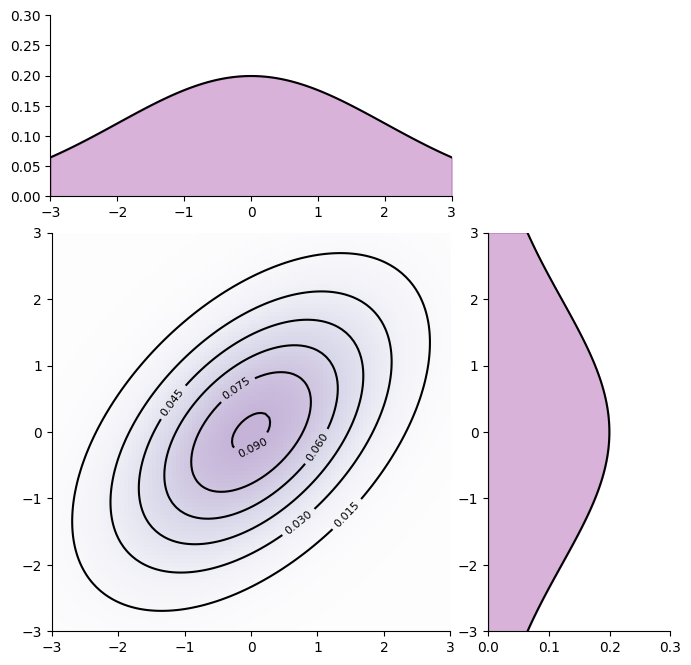

In [73]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# Create a 2D Gaussian distribution with mean vector [0, 0] 
# and covariance matrix [[1, 1], [1, 2]]
norm2d = torch.distributions.MultivariateNormal(loc = torch.zeros(2), 
                                covariance_matrix=torch.eye(2) + 1.)

# Create a 2D grid of points in the range [-3, 3] 
# with 100 steps in each direction
xs = torch.linspace(-3., 3., steps=100)
ys = torch.linspace(-3.,3., steps=100)
xx, yy = torch.meshgrid(xs, ys, indexing="xy")

# Compute the density of the multivariate Gaussian at each point on the grid
norm2d_densities = norm2d.log_prob(torch.vstack((xx.ravel(), 
                            yy.ravel())).t()).reshape(xx.shape).exp()

# Compute the marginal density of the Gaussian for each variable
marginal_x = torch.distributions.Normal(norm2d.loc[0], 
                            norm2d.covariance_matrix[0, 0])

marginal_y = torch.distributions.Normal(norm2d.loc[1], 
                            norm2d.covariance_matrix[1, 1])

marginal_x_vals = marginal_x.log_prob(xs).exp().numpy()
marginal_y_vals = marginal_y.log_prob(ys).exp().numpy()

# Plot the results
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2], sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2], sharey=ax_main)

contours = ax_main.contour(xx, yy, norm2d_densities, 
                           6, colors="black")
ax_main.clabel(contours, inline=True, fontsize=8)

ax_main.imshow(norm2d_densities, 
               extent=[-3, 3, -3, 3], origin="lower", 
               cmap="Purples", alpha=0.3)

ax_xDist.plot(xs, marginal_x_vals, color="k")
ax_yDist.plot(marginal_y_vals, ys, color="k")

ax_xDist.fill_between(xs, marginal_x_vals, 0, color='purple', alpha=0.3)

ax_xDist.set_ylim((0, 0.3))

ax_yDist.fill_betweenx(ys, marginal_y_vals, 0, color='purple', alpha=0.3)

ax_yDist.set_xlim((0, 0.3))
sns.despine();

Let us next take samples from the same distribution. Play with the sample size in the code below and observe how it affects the accuracy of the resulting mean and variance estimates compared to the true values.

Mean: tensor([0.0398, 0.0600])
Covariance:
tensor([[1.8607, 1.0072],
        [1.0072, 2.0132]])


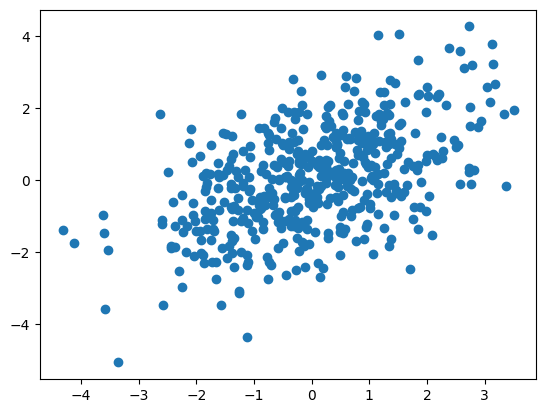

In [74]:
samples = norm2d.sample((500,))

print("Mean: {0}".format(samples.mean(0)))
print("Covariance:")
print(samples.T.cov())

plt.scatter(samples[:, 0], samples[:, 1])
plt.show()



Let us next see how the Dirichlet distribution behaves.

In [75]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

dir1 = torch.distributions.Dirichlet(torch.tensor([1., 1., 1.]))
samples1 = dir1.sample([10000, ])

dir10 = torch.distributions.Dirichlet(torch.tensor([10., 10., 10.]))
samples10 = dir10.sample([10000, ])

# Only the relative proportions determine the mean
print("Means:")
print(samples1.mean(0))
print(samples10.mean(0))

print("Variances:")
# The variance is inversely proportional to the concentration parameter
print(samples1.var(0))
print(samples10.var(0))



Means:
tensor([0.3336, 0.3284, 0.3380])
tensor([0.3320, 0.3344, 0.3336])
Variances:
tensor([0.0557, 0.0550, 0.0559])
tensor([0.0072, 0.0073, 0.0075])


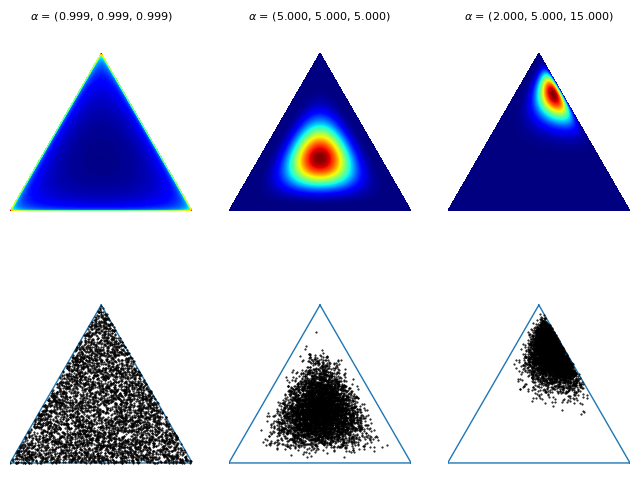

In [76]:
# Source: https://gist.github.com/tboggs/8778945

from __future__ import division, print_function

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

_corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
_AREA = 0.5 * 1 * 0.75**0.5
_triangle = tri.Triangulation(_corners[:, 0], _corners[:, 1])

# For each corner of the triangle, the pair of other corners
_pairs = [_corners[np.roll(range(3), -i)[1:]] for i in range(3)]
# The area of the triangle formed by point xy and another pair or points
tri_area = lambda xy, pair: 0.5 * np.linalg.norm(np.cross(*(pair - xy)))

def xy2bc(xy, tol=1.e-4):
    '''Converts 2D Cartesian coordinates to barycentric.
    Arguments:
        `xy`: A length-2 sequence containing the x and y value.
    '''
    coords = np.array([tri_area(xy, p) for p in _pairs]) / _AREA
    return np.clip(coords, tol, 1.0 - tol)

class Dirichlet(object):
    def __init__(self, alpha):
        '''Creates Dirichlet distribution with parameter `alpha`.'''
        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / \
                     np.multiply.reduce([gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        return self._coef * np.multiply.reduce([xx ** (aa - 1)
                                    for (xx, aa)in zip(x, self._alpha)])
    def sample(self, N):
        '''Generates a random sample of size `N`.'''
        return np.random.dirichlet(self._alpha, N)

def draw_pdf_contours(dist, border=False, nlevels=200, subdiv=8, **kwargs):
    '''Draws pdf contours over an equilateral triangle (2-simplex).
    Arguments:
        `dist`: A distribution instance with a `pdf` method.
        `border` (bool): If True, the simplex border is drawn.
        `nlevels` (int): Number of contours to draw.
        `subdiv` (int): Number of recursive mesh subdivisions to create.
        kwargs: Keyword args passed on to `plt.triplot`.
    '''
    from matplotlib import ticker, cm
    import math

    refiner = tri.UniformTriRefiner(_triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, cmap='jet', **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')
    if border is True:
        plt.triplot(_triangle, linewidth=1)

def plot_points(X, barycentric=True, border=True, **kwargs):
    '''Plots a set of points in the simplex.
    Arguments:
        `X` (ndarray): A 2xN array (if in Cartesian coords) or 3xN array
                       (if in barycentric coords) of points to plot.
        `barycentric` (bool): Indicates if `X` is in barycentric coords.
        `border` (bool): If True, the simplex border is drawn.
        kwargs: Keyword args passed on to `plt.plot`.
    '''
    if barycentric is True:
        X = X.dot(_corners)
    plt.plot(X[:, 0], X[:, 1], 'k.', ms=1, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')
    if border is True:
        plt.triplot(_triangle, linewidth=1)

if __name__ == '__main__':
    f = plt.figure(figsize=(8, 6))
    alphas = [[0.999] * 3,
              [5] * 3,
              [2, 5, 15]]
    for (i, alpha) in enumerate(alphas):
        plt.subplot(2, len(alphas), i + 1)
        dist = Dirichlet(alpha)
        draw_pdf_contours(dist)
        title = r'$\alpha$ = (%.3f, %.3f, %.3f)' % tuple(alpha)
        plt.title(title, fontdict={'fontsize': 8})
        plt.subplot(2, len(alphas), i + 1 + len(alphas))
        plot_points(dist.sample(5000))

# Estimators and bias

**Estimator:** A function $f$ that maps a sample $S$ to a value $\hat{\theta} = f(S)$ is called an **estimator** of the parameter $\theta$. For instance, the sample mean $\widehat{X} = \frac{1}{n} \sum_{i=1}^n X_i$ is an estimator of the mean $\mu$ of a random variable $X$.

**Estimator Bias:** The **bias** of an estimator $f$ is defined as $B(f) = E[f(S)] - \theta$. An estimator is said to be **unbiased** if $B(f) = 0$.

For example, the sample mean $\widehat{X}$ is an unbiased estimator of the mean $\mu$ of a random variable $X$ because:

\begin{align*}
B(\widehat{X}) &= E[\widehat{X}] - \mu \\
&= E\left[\frac{1}{n} \sum_{i=1}^n X_i \right] - \mu \\
&= \frac{1}{n} \sum_{i=1}^n E[X_i] - \mu \\
&= \frac{1}{n} \sum_{i=1}^n \mu - \mu \\
&= 0.  
\end{align*}

However, the sample variance $S^2 = \frac{1}{n} \sum_{i=1}^n (X_i - \widehat{X})^2$ is a biased estimator of the variance $\sigma^2$ of a random variable $X$. That is why is it common to use the **unbiased sample variance** $\frac{1}{n-1} \sum_{i=1}^n (X_i - \widehat{X})^2$ instead of the sample variance $S^2$. The change made in the denominator is called **Bessel's correction**.


**Consistency:** An estimator $f$ is said to be **consistent** if $\lim_{n \to \infty} P(|f(S) - \theta| \geq \epsilon) = 0$ for any $\epsilon > 0$. That is, the probability of the estimator being far from the true value goes to zero as the sample size increases.

# Concentration of measure inequalities

**Theorem 5.1 (Markov's inequality)** Let $X$ be a non-negative random variable. Then for any $\epsilon > 0$, the following inequality holds:

$P(X \geq \epsilon) \leq \frac{E[X]}{\epsilon}$.

**Example:** Consider ten Bernoulli random variables $X_1, \ldots, X_{10}$ with $P(X_i = 1) = P(X_i = 0) = 0.5$. Since $E[\sum_{i=1}^{10} X_i] = 5$, Markov's inequality only gives us the bound $P(\sum_{i=1}^{10} X_i \geq 3) \leq 5/3$, which is trivial. Such bounds are called **vacuous**.

**Theorem 5.2 (Chebyshev's inequality)** Let $X$ be a random variable with finite mean $\mu$ and variance $\sigma^2$. Then for any $\epsilon > 0$, the following inequality holds: 

$P(|X - \mu| \geq \epsilon) \leq \frac{\sigma^2}{\epsilon^2}$.

Consider the sample $S=\{X_1, \ldots, X_n\}$ of i.i.d. Bernoulli distributed random variables with sample average $\widehat{\mu}_n = \frac{1}{n} \sum_{i=1}^n X_i$. We may wonder how much $\widehat{\mu}_n$ deviates from the mean $\mu$ of $X$. Markov's inequality would give us only:

\begin{align*}
P(\widehat{\mu}_n - E[\widehat{\mu}_n] \geq \epsilon) &= P(\widehat{\mu}_n \geq E[\widehat{\mu}_n] + \epsilon) \\
&= P(\widehat{\mu}_n \geq \mu + \epsilon) \\
&\leq \frac{E[\widehat{\mu}]}{E[\widehat{\mu}]+ \epsilon} \\
&= \frac{\mu}{\mu + \epsilon}.
\end{align*}

Remarkably, this inequality will not get tighter no matter how large $n$ is. In order to analyze machine learning algorithms, we need bounds that get tighter as $n$ increases, i.e. the learning agent collects more experience. Chebyshev's inequality does exactly that:

\begin{align*}
P(|\widehat{\mu}_n - E[\widehat{\mu}_n]| \geq \epsilon) &\leq \frac{Var[\widehat{\mu}_n]}{\epsilon^2} \\
&= \frac{Var\left[\frac{1}{n}\sum_{i=1}^n X_i\right]}{\epsilon^2} \\
&= \frac{1}{n^2}\frac{\sum_{i=1}^n Var[X_i]}{\epsilon^2} \\
&= \frac{1}{n^2}\frac{n Var[\widehat{\mu}_n]}{\epsilon^2} \\
&= \frac{Var[\widehat{\mu}_n]}{n \epsilon^2} \\
&= \frac{\sigma^2}{n \epsilon^2}.
\end{align*}

The derivation uses the following two properties of variance in second and third steps, respectively: 

 - $Var[\sum_{i=1}^n X_i] = \sum_{i=1}^n Var[X_i]$ for i.i.d. random variables $X_i$, 

 -  $Var[aX] = a^2 Var[X]$ for any random variable $X$ and constant $a$.

An immediate consequence of this inequality is that the sample mean $\widehat{\mu}_n$ converges to the true mean $\mu$ as the sample size $n$ increases. This is called the **weak law of large numbers**. Formally it is stated as follows.

**Theorem 5.3 (Weak law of large numbers)** Let $X_1, \ldots, X_n$ be i.i.d. random variables with finite mean $\mu$ and variance $\sigma^2$. Then for any $\epsilon > 0$, the following inequality holds:

$\lim_{n \to \infty} P(|\widehat{\mu}_n - \mu| \geq \epsilon) = 0$

where $\widehat{\mu}_n = \frac{1}{n} \sum_{i=1}^n X_i$.

Via law of large numbers, we conclude that the sample mean $\widehat{\mu}_n$ is a consistent estimator of the mean $\mu$ of a random variable $X$. In other words, the sample mean converges to the true mean as the sample size increases.

Chebyshev's inequality gets tighter at the rate $1/n$. By making further assumptions on the random variables, we can make the bound tighter at a faster rate. For instance, if the random variables are bounded, we can use Hoeffding's inequality to get a bound that decreases exponentially with $n$.

**Theorem 5.4 (Hoeffding's inequality)** Let $X_1, \ldots, X_n$ be i.i.d. random variables such that $P(a_i \leq X_i \leq b_i) = 1$ for all $i$. Then for any $\epsilon > 0$, the following inequality holds:

$P(\frac{1}{n} \sum_{i=1}^n X_i - E[\frac{1}{n} \sum_{i=1}^n X_i] \geq \epsilon) \leq e^{-2n\epsilon^2/\sum_{i=1}^n(b_i-a_i)^2}$.

We aim to use these inequalities to bound the generalization performances of learning algorithms. Imagine that $X_i$ is the loss of the $i$-th training example. Then $\widehat{\mu}_n = \frac{1}{n} \sum_{i=1}^n X_i$ is the empirical risk of the learning algorithm and $\mu = E[\widehat{\mu}_n]$ is the expected risk. For simplicity let us consider the case where $X_i \in [0,1]$ for all $i$. Then we have

$P(\mu \geq \widehat{\mu}_n + \epsilon) \leq e^{-2n\epsilon^2}$.

We would like to bound the probability that the empirical risk deviates from the expected risk with respect to level of confidence. Denoting $\delta := e^{-2n\epsilon^2}$ and solving for $\epsilon$ yields

\begin{align*}
\epsilon = \sqrt{\dfrac{\log \frac{1}{\delta}}{2n}}
\end{align*}

Plugging this value of $\epsilon$ into the inequality above we have

$P \left(\mu \geq\widehat{\mu}_n + \sqrt{\dfrac{\log \frac{1}{\delta}}{2n}} \right ) \leq \delta$.

Later on we will allocate $\mu$ for generalization performance and $\widehat{\mu}_n$ for training performance. Hence we will be more interested in the complementary event:

$P \left(\mu \leq\widehat{\mu}_n + \sqrt{\dfrac{\log \frac{1}{\delta}}{2n}} \right ) \geq 1 - \delta$.

Concentration inequalities of this form are the basis of statistical learning theory. They are also called **generalization bounds** because they bound the generalization performance of learning algorithms. We will cover them in more detail in the next chapter.